In [1]:
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')  
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 20

In [2]:
def rk4(f,t,h,y,n):       # Runge-Kutta parameters: t, step,dimension
    k1 = [0.]*(n+1)
    k2 = [0.]*(n+1)
    k3 = [0.]*(n+1)
    k4 = [0.]*(n+1)
    fR = [0.]*(n+1)
    ydumb = [0.]*(n+1)
    fR = f(t, y)                  # Returns rhs
    for i in range(0,n+1):
        k1[i]  =  h*fR[i]                     
    for i in range(0, n+1):
        ydumb[i]  =  y[i] + k1[i]/2.  
    fR = f(t + h/2.,ydumb)
    for i in range(0, n+1):
        k2[i] = h*fR[i]
        ydumb[i]  =  y[i] + k2[i]/2.    
    fR = f(t + h/2., ydumb)
    for i in range(0, n+1):
        k3[i] = h*fR[i]
        ydumb[i]  =  y[i] + k3[i] 
    fR = f(t + h, ydumb)
    for i in range(0, n+1):
        k4[i] = h*fR[i]
        ydumb[i]  =  y[i] + k4[i] 
    for i in range(0, n+1):
        y[i]  =  y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6. # RK4
    return y

In 1961 Edward Lorenz used a simplified version of the hydrodynamic equations including convection, viscosity, and gravity to predict weather patterns.                                                   
The computations were so sensitive to parameter values that at first he thought he had a numerical problem,                
though eventually realized that the system was chaotic [Peitgen et al.(94),Motter & Campbell(13)].                         
Lorenz’s equations with simplified variables are                                                                                                          
$ \quad \dot{x}= \delta(y-x)  $                                                                                               
$ \quad \dot{y}= x(\rho-z)-y $                                                                                              
$\quad \dot{z}=xy-{\beta z} $                                                                                                                   
where $x(t)$ is a measure of fluid velocity as a function of time $t, y(t)$ and $z(t)$ are                                  
measures of the $y$ and $z$ temperature distributions, and $\sigma,\rho,$ and $\beta$ are parameters.                        
The $xz$ and $xy$ terms make these equations non-linear.                                                                    
1. Modify your ODE solver to handle these three, simultaneous Lorenz equations.                                              
2. To start, use parameter values $\sigma = 10, \rho = \frac{8}{3},$ and $\beta = 28.$                                              
3. Make sure to use a small enough step size so that good precision is obtained.                                                  
You must have confidence that you are seeing chaos and not numerical error.                                                       
4. Makes plots of $x$ versus $t, y$ versus $t,$ and $z$ versus $t.$                                                          
5. The initial behaviors in these plots are called “transients” and are not considered dynamically interesting.        
Leave off these transients in the plots to follow.                                                                           
6. Make a “phase space” plot of $z(t)$ versus $x(t)$.                                                                    
The distorted, number eightlike figures you obtain  are called Lorenz attractors, “attractors” because even chaotic solutions tend to be attracted to them.                                                                                             
7. Make phase space plots of $y(t)$ versus $x(t)$ and $z(t)$ versus $y(t)$.                                                         
8. Make a 3-D plot of $x(t)$ versus $y(t)$ versus $z(t)$.                                                                       
9. The parameters given to you should lead to chaotic solutions.                                                       
Check this claim by finding the smallest change you can make in a parameter that still produce different answers.           
10. Make a 2-D plot of $z_{n+1}$ versus $z_n$.

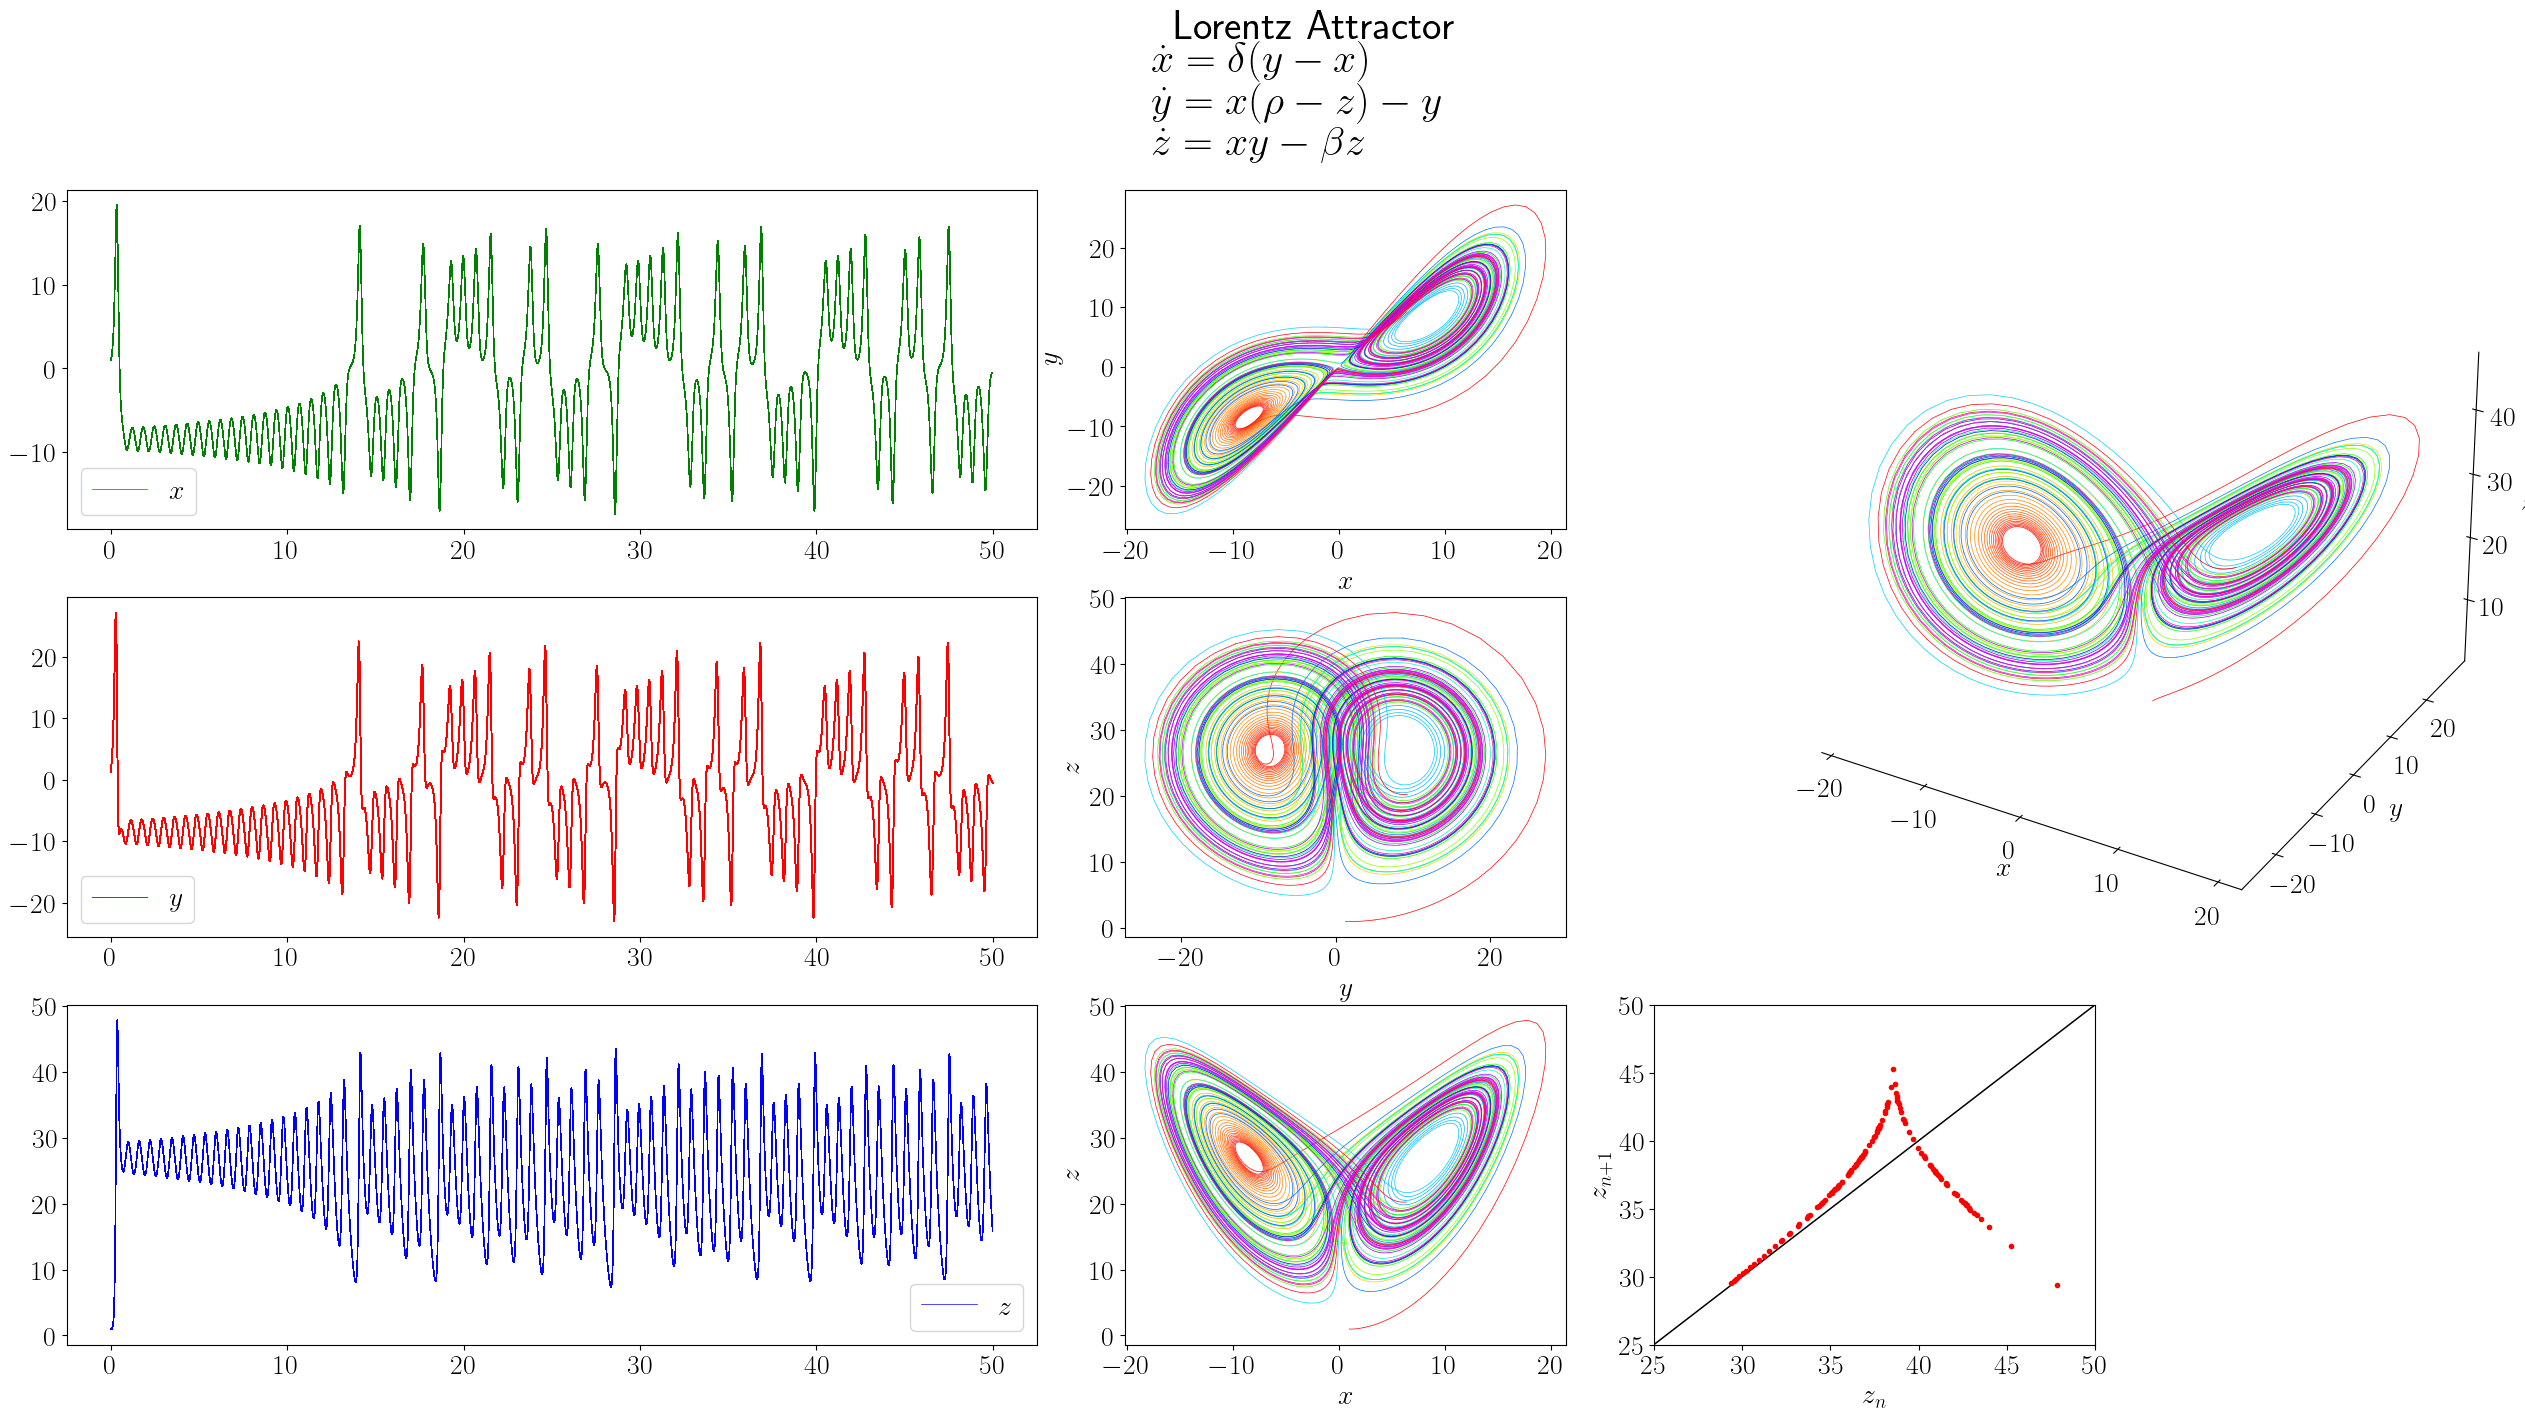

In [5]:
N = 10000
dt = 0.01           # time interval
t = np.arange(0,100,dt)
xx = np.zeros(int(N),float)            # position
yy = np.zeros(int(N),float)            # velocity
zz = np.zeros(int(N),float)            # position

def Lf(t,y):       # RHS
    rhs = [0]*(3)  # coupled eqs
    sigma = 10.    # constant in Lorentz eqs
    b =  8./3.
    r = 28
    rhs[0] = -sigma*(y[0]-y[1])    # xdot =  -sigma*(x-y)
    rhs[1] = r*y[0]-y[1]-y[0]*y[2] # ydot = r*x-y-x*z
    rhs[2] = -b*y[2]+y[0]*y[1]     # zdot = -b*z+x*y
    return rhs
    
y = [0]*(3)
y[0] = 1     # init x
y[1] = 1     # init y
y[2] = 1      # init z
#f(0,y)       # initialize

for i in range(len(t)):
    r = rk4(Lf,t[i],dt,y,2)    
    xx[i] = r[0]
    yy[i] = r[1]
    zz[i] = r[2]

fig = plt.figure(figsize=(33,15))
fig.suptitle('Lorentz Attractor'+ r'$ \\ \dot{x}= \delta(y-x)  \\ \dot{y}= x(\rho-z)-y \\ \dot{z}=xy-{\beta z} $',
              fontsize=30,y=1.)
gs=fig.add_gridspec(3,5)
ax1=fig.add_subplot(gs[0:2,3:5], projection='3d')
ax2=fig.add_subplot(gs[0,0:2])
ax3=fig.add_subplot(gs[1,0:2])
ax4=fig.add_subplot(gs[2,0:2])
ax5=fig.add_subplot(gs[0,2])
ax6=fig.add_subplot(gs[1,2])
ax7=fig.add_subplot(gs[2,2])
ax8=fig.add_subplot(gs[2,3])
ax1.xaxis.set_pane_color((1,1,1,1))
ax1.yaxis.set_pane_color((1,1,1,1))
ax1.zaxis.set_pane_color((1,1,1,1))
ax1.xaxis.pane.set_edgecolor('w')
ax1.yaxis.pane.set_edgecolor('w')
ax1.zaxis.pane.set_edgecolor('w')
ax1.grid(False)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_zlabel(r'$z$')
ax5.set_xlabel(r'$x$')
ax5.set_ylabel(r'$y$')
ax6.set_xlabel(r'$y$')
ax6.set_ylabel(r'$z$')
ax7.set_xlabel(r'$x$')
ax7.set_ylabel(r'$z$')
ax8.set_xlabel(r'$z_n$')
ax8.set_ylabel(r'$z_{n+1}$')
s = 10
n = 10000
for i in range(0,n-s,s):
    ax1.plot(xx[i:i+s+1], yy[i:i+s+1], zz[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax2.plot(t[:5000],xx[:5000],'g', linewidth=0.5)
    ax3.plot(t[:5000],yy[:5000],'r', linewidth=0.7)
    ax4.plot(t[:5000],zz[:5000],'b', linewidth=0.5)
    ax5.plot(xx[i:i+s+1], yy[i:i+s+1], color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax6.plot(yy[i:i+s+1], zz[i:i+s+1], color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax7.plot(xx[i:i+s+1], zz[i:i+s+1], color=plt.cm.hsv((i+1)/n), linewidth=0.5)
ax2.legend([r'$x$'])
ax3.legend([r'$y$'])
ax4.legend([r'$z$'])

def FindMaxima(numbers):
    maxima = []
    length = len(numbers)
    if length >= 2:
        if numbers[0] > numbers[1]:
              maxima.append(numbers[0])

    if length > 3:
        for i in range(1, length-1):     
            if numbers[i] > numbers[i-1] and numbers[i] > numbers[i+1]:
                maxima.append(numbers[i])
    
    if numbers[length-1] > numbers[length-2]:    
        maxima.append(numbers[length-1])        
    return maxima

zmax2 = FindMaxima(zz)
ax8.axline([0, 0], [1, 1], color = 'black', linestyle = '-', linewidth = 1.1)
ax8.plot(zmax2[1:-2], zmax2[2:-1], 'r.')
ax8.set_xlim([25,50])
ax8.set_ylim([25,50])
plt.show()

Investigate the simplified version of the Lorenz attractors developed by Roessler [Becker(86)]:                                               
$ \quad \dot{x} = −y − z $                                                                                                      
$\quad \dot{y} = x + ay $                                                                                                        
$\quad \dot{z} = b + xz − cz $                                                                                                        
$\quad (a, b, c) = (0.2, 0.2, 5.7). $                                                                                                            
a. Compute and plot $x(t), y(t),$ and $z(t)$ as functions of time.                                                                 
b. Plot projections of your solutions onto the $(x, y)$ and $(x, \dot{x})$ planes.                                                       
c. Make a Poincaré mapping of the transverse section $\dot{x} = 0$.                                                                      
$\quad $(A Poincaré mapping is the intersection of a periodic orbit in the phase space with a lower-dimensional subspace.)               
d. When $\dot{x} = 0, x$ has an extremum. Plot the value of the extrema $x_{i+1}$ as a function of the previous extremum $x_i$.

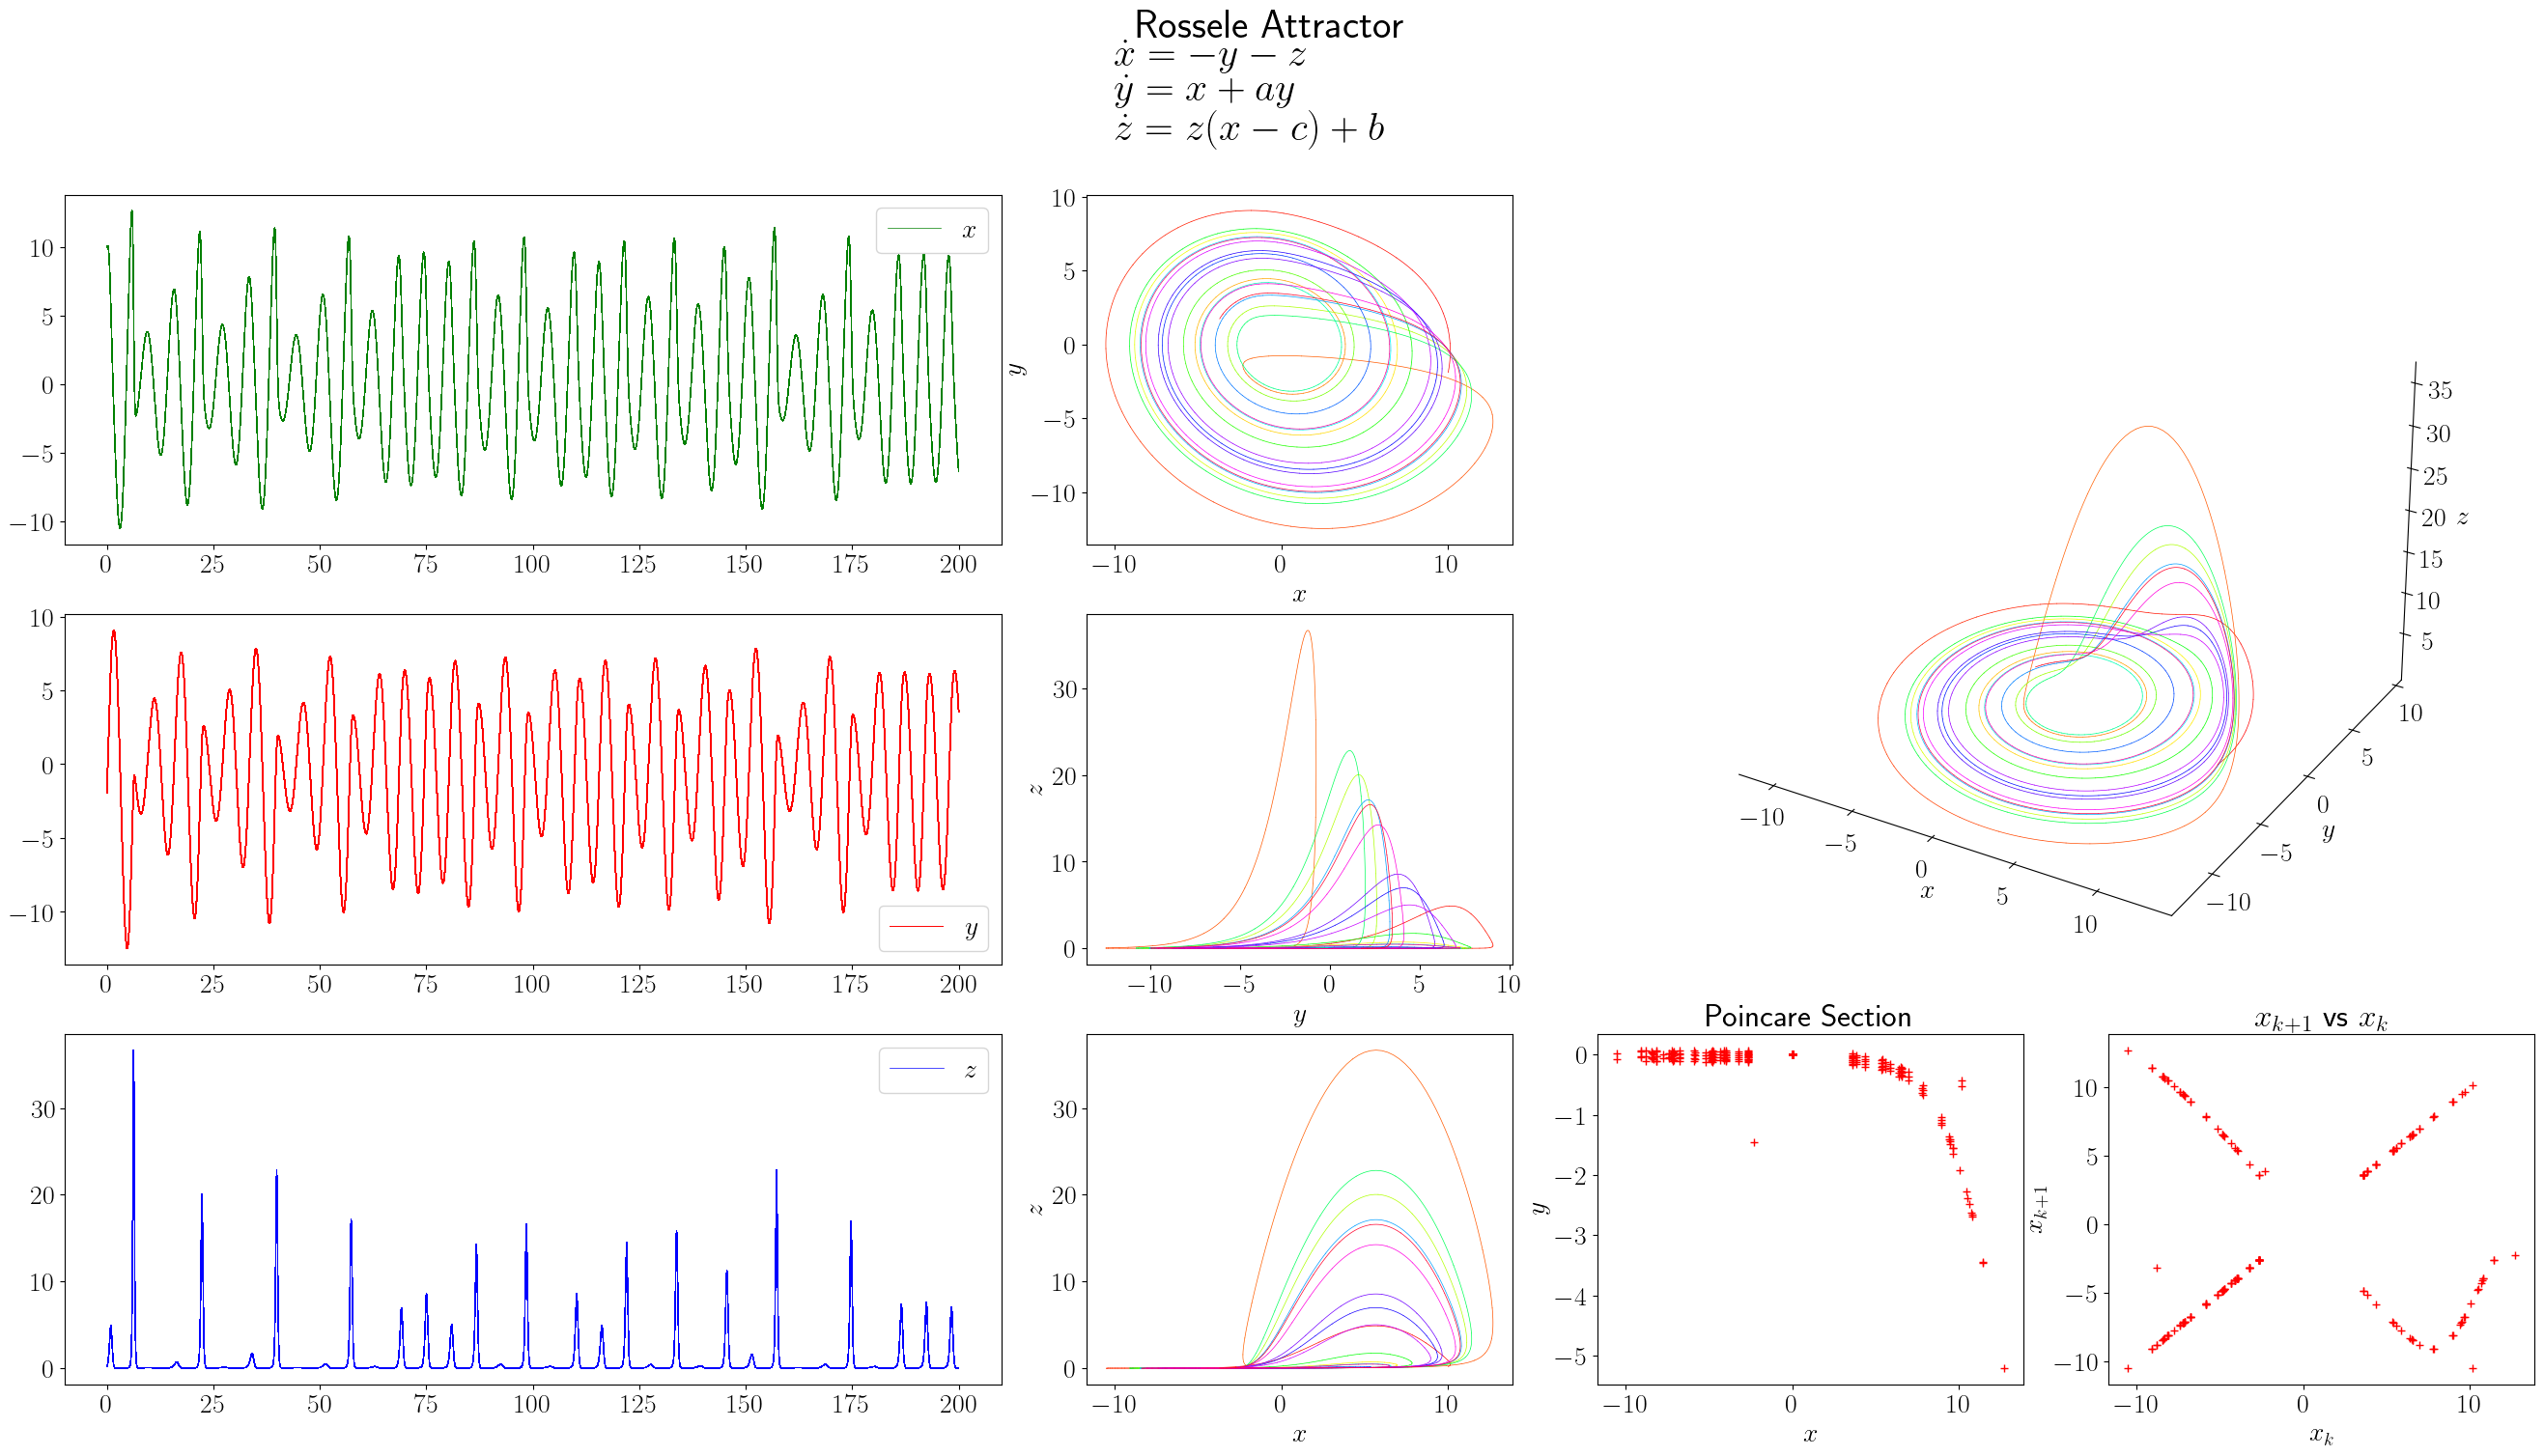

In [25]:
N = 20000
dt = 0.01 
j = 1
t = np.arange(0,200,dt)
xx = np.zeros(int(N),float)            # position
yy = np.zeros(int(N),float)            # velocity
zz = np.zeros(int(N),float)            # position
ydo = np.zeros(int(N/2),float)
xdo = np.zeros(int(N/2),float)
xexp = []
xexm = []

def Rf(t,y):      # RHS equation
    a = 0.2       
    b = 0.2      
    c = 5.7 
    rhs = [0]*(3)  # 3 coupled eqs.
    rhs[0] = -y[1]-y[2]            # xdot =  -y-z
    rhs[1] = y[0] + a*y[1]         # ydot = x+ay
    rhs[2] = b + y[0]*y[2]-c*y[2]  # zdot = b+xz-cz
    return rhs
         
y = [0]*(3)
y[0] = 10     # initial x conditions
y[1] = -2     # init y
y[2] = 0.2    # init z
#f(0,y)       # function for t = 0 

for i in range(len(t)):
    r = rk4(Rf,t[i],dt,y,2)    # call runge kutta   
    xx[i] = r[0]
    yy[i] = r[1]
    zz[i] = r[2]
    xd = -yy[i]-zz[i]
    if xd >-0.1 and xd<0.1:  # for Poincare map
        xdo[j] = xx[i]
        ydo[j] = yy[i]
        xexp.append(xdo[j])   # to plot xk+1 vs xk
        xexm.append(xdo[j-1])
        j += 1
    
fig = plt.figure(figsize=(33,16))
fig.suptitle('Rossele Attractor'+ r'$ \\ \dot{x}= -y-z  \\ \dot{y}= x+ay \\ \dot{z}= z(x- c)+b $',
              fontsize=30,y=1.)
gs=fig.add_gridspec(3,5)
ax1=fig.add_subplot(gs[0:2,3:5],projection='3d')
ax2=fig.add_subplot(gs[0,0:2])
ax3=fig.add_subplot(gs[1,0:2])
ax4=fig.add_subplot(gs[2,0:2])
ax5=fig.add_subplot(gs[0,2])
ax6=fig.add_subplot(gs[1,2])
ax7=fig.add_subplot(gs[2,2])
ax8=fig.add_subplot(gs[2,3])
ax9=fig.add_subplot(gs[2,4])
ax1.xaxis.set_pane_color((1,1,1,1))
ax1.yaxis.set_pane_color((1,1,1,1))
ax1.zaxis.set_pane_color((1,1,1,1))
ax1.xaxis.pane.set_edgecolor('w')
ax1.yaxis.pane.set_edgecolor('w')
ax1.zaxis.pane.set_edgecolor('w')
ax1.grid(False)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_zlabel(r'$z$')
ax5.set_xlabel(r'$x$')
ax5.set_ylabel(r'$y$')
ax6.set_xlabel(r'$y$')
ax6.set_ylabel(r'$z$')
ax7.set_xlabel(r'$x$')
ax7.set_ylabel(r'$z$')
ax8.set_xlabel(r'$x$')
ax8.set_ylabel(r'$y$')
ax9.set_xlabel('$x_k$')
ax9.set_ylabel('$x_{k+1}$')
ax8.set_title("Poincare Section")
ax9.set_title('$x_{k+1}$ vs $x_k$')
s = 10
n = 10000
for i in range(0,n-s,s):
    ax1.plot(xx[i:i+s+1], yy[i:i+s+1], zz[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax2.plot(t,xx,'g', linewidth=0.5)
    ax3.plot(t,yy,'r', linewidth=0.7)
    ax4.plot(t,zz,'b', linewidth=0.5)
    ax5.plot(xx[i:i+s+1],yy[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax6.plot(yy[i:i+s+1],zz[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax7.plot(xx[i:i+s+1],zz[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
ax2.legend([r'$x$'])
ax3.legend([r'$y$'])
ax4.legend([r'$z$'])
ax8.plot(xdo,ydo,'r+')
ax9.plot(xexm[1:],xexp[1:],'r+')
plt.show()

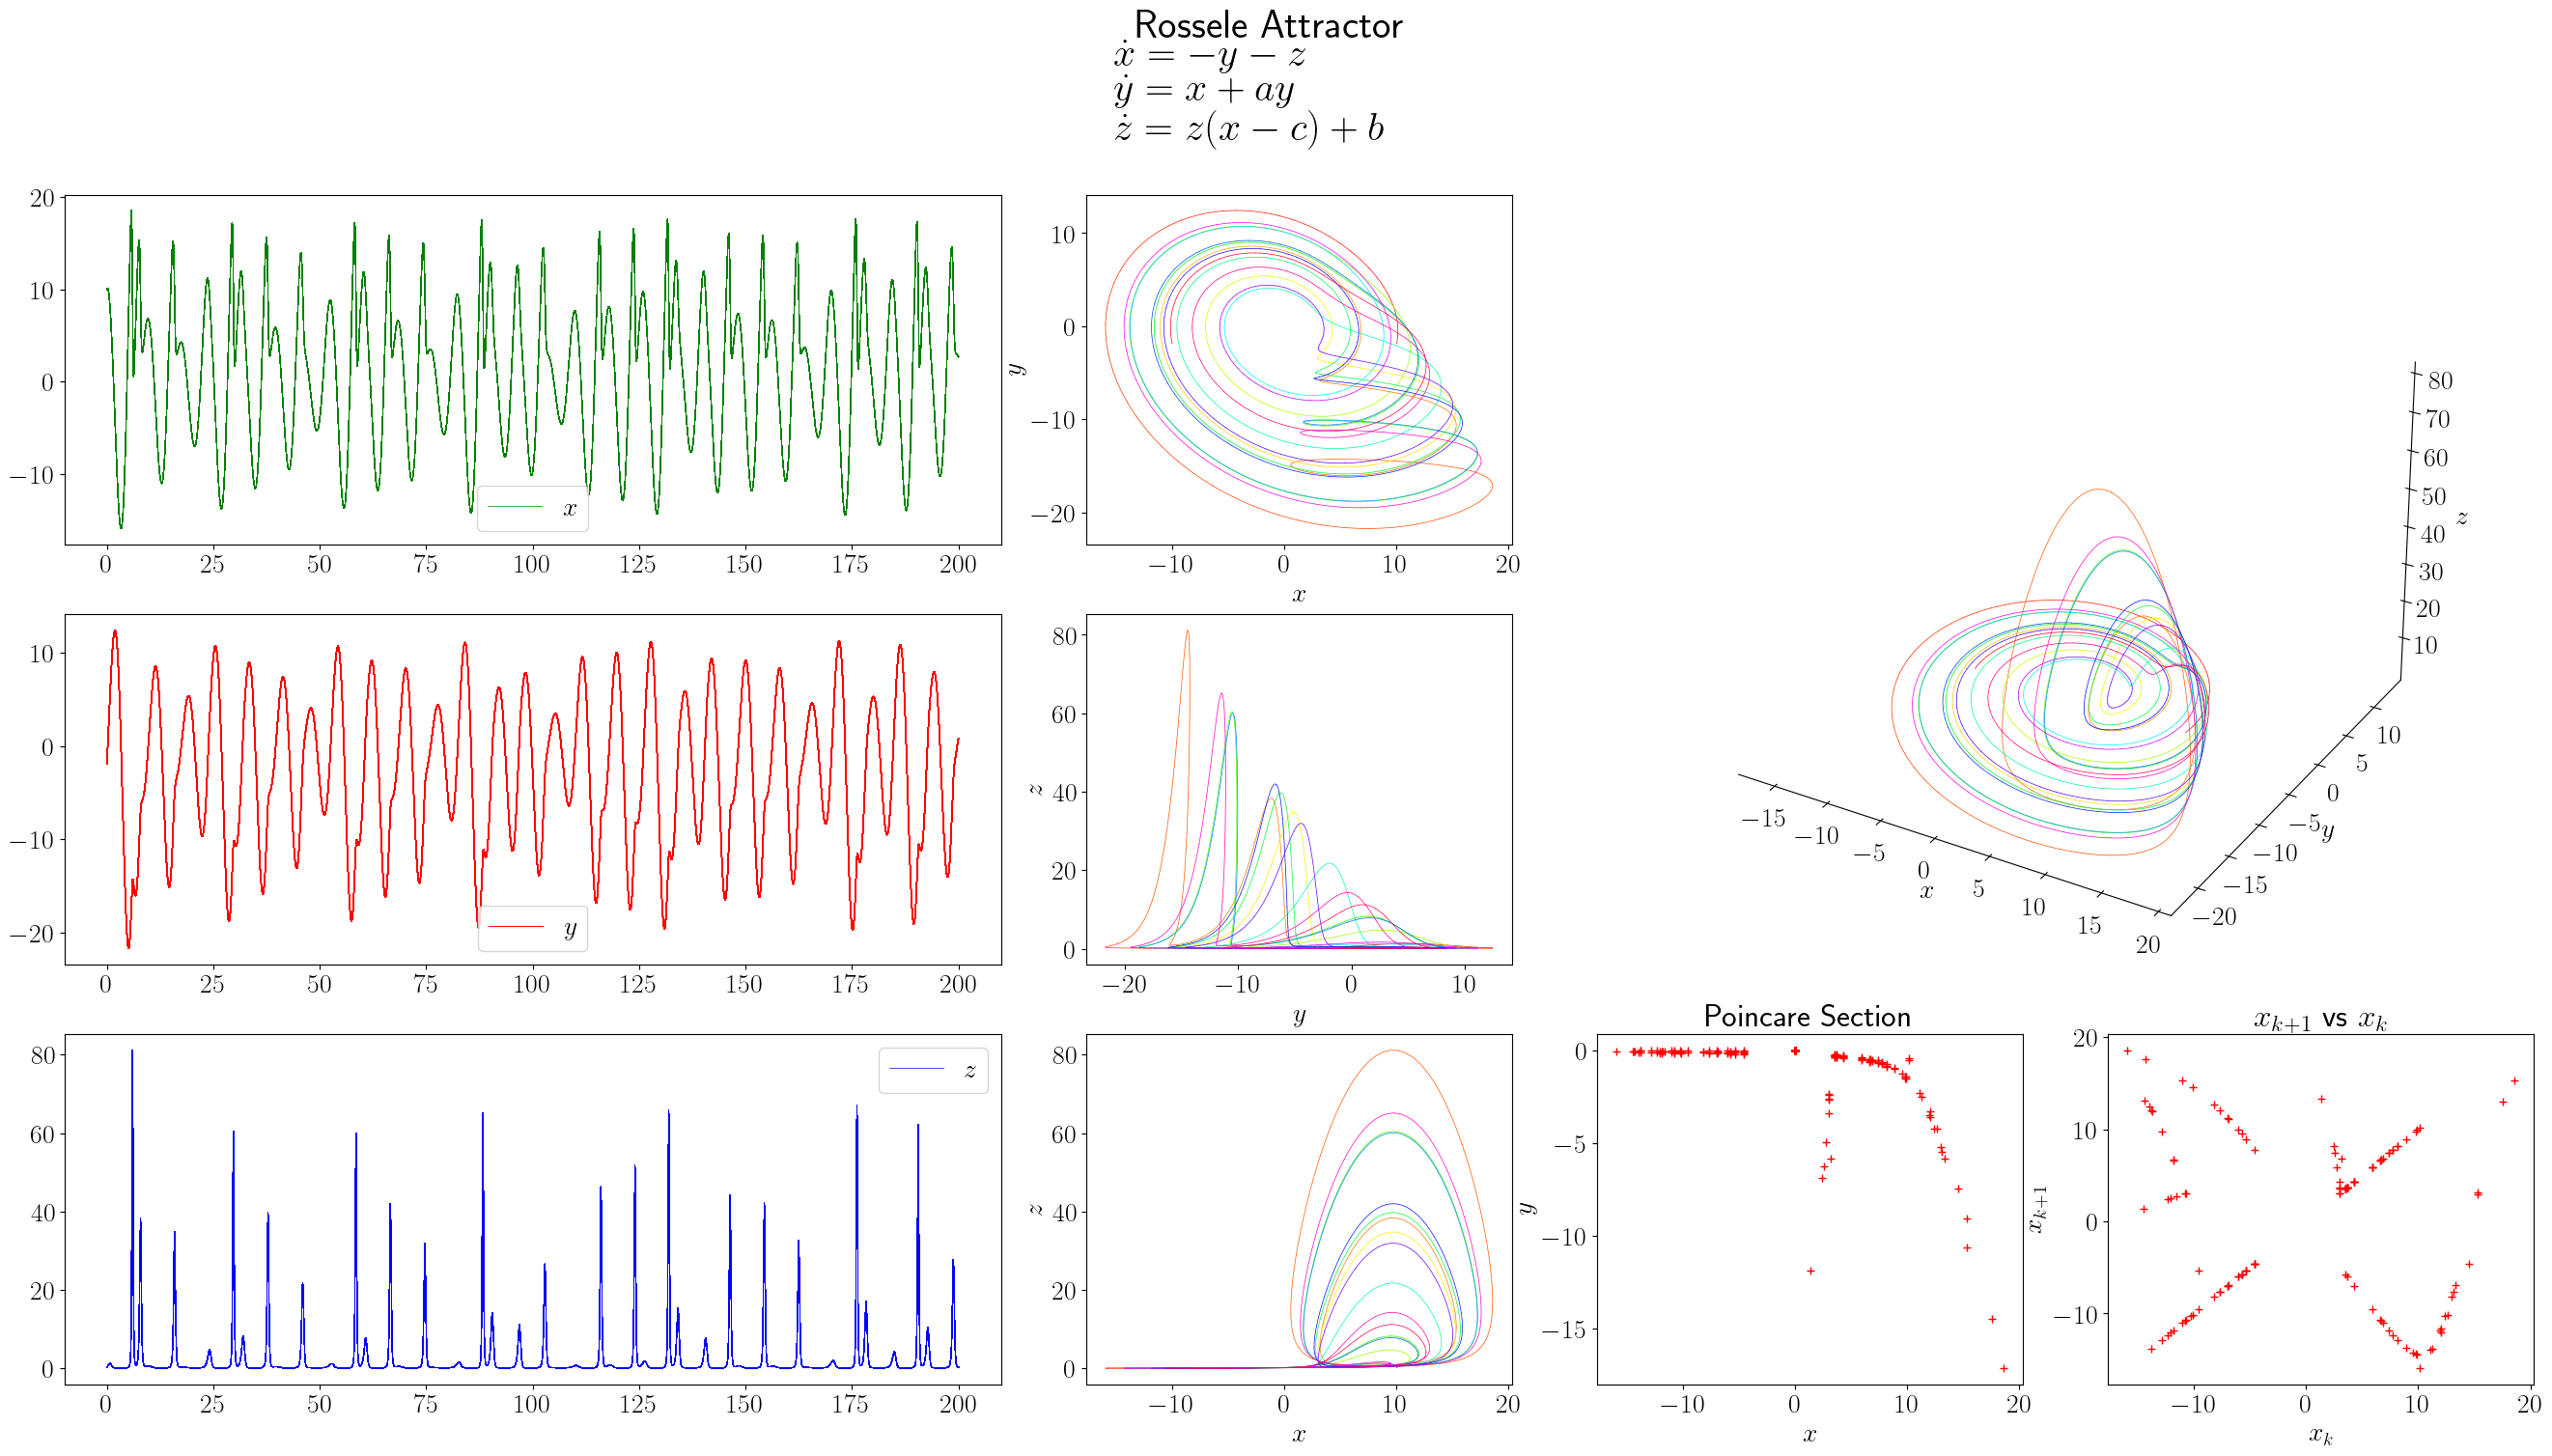

In [21]:
N = 20000
dt = 0.01 
T = np.arange(0,200,dt)
tt = np.zeros(int(N),float)            # time
xx = np.zeros(int(N),float)            # position
yy = np.zeros(int(N),float)            # velocity
zz = np.zeros(int(N),float)            # position
ydo = np.zeros(int(N/2),float)
xdo = np.zeros(int(N/2),float)
xexp = []
xexm = []

def Rf(t,y):      # RHS equation
    a = 0.343        
    b = 1.82       
    c = 9.75 
    rhs = [0]*(3)  # 3 coupled eqs.
    rhs[0] = -y[1]-y[2]            # xdot =  -y-z
    rhs[1] = y[0] + a*y[1]         # ydot = x+ay
    rhs[2] = b + y[0]*y[2]-c*y[2]  # zdot = b+xz-cz
    return rhs
        
y = [0]*(3)
y[0] = 10     # initial x conditions
y[1] = -2     # init y
y[2] = 0.2    # init z
#f(0,y)       # function for t = 0 
dt = 0.01
i = 0
j = 1

for t in T:
    r = rk4(Rf,t,dt,y,2)    # call runge kutta   
    tt[i] = t
    xx[i] = r[0]
    yy[i] = r[1]
    zz[i] = r[2]
    xd = -yy[i]-zz[i]
    if xd >-0.1 and xd<0.1:  # for Poincare map
        xdo[j] = xx[i]
        ydo[j] = yy[i]
        xexp.append(xdo[j])   # to plot xk+1 vs xk
        xexm.append(xdo[j-1])
        j += 1
    i += 1
    
fig = plt.figure(figsize=(33,16))
fig.suptitle('Rossele Attractor'+ r'$ \\ \dot{x}= -y-z  \\ \dot{y}= x+ay \\ \dot{z}= z(x- c)+b $',
              fontsize=30,y=1.)
gs=fig.add_gridspec(3,5)
ax1=fig.add_subplot(gs[0:2,3:5],projection='3d')
ax2=fig.add_subplot(gs[0,0:2])
ax3=fig.add_subplot(gs[1,0:2])
ax4=fig.add_subplot(gs[2,0:2])
ax5=fig.add_subplot(gs[0,2])
ax6=fig.add_subplot(gs[1,2])
ax7=fig.add_subplot(gs[2,2])
ax8=fig.add_subplot(gs[2,3])
ax9=fig.add_subplot(gs[2,4])
ax1.xaxis.set_pane_color((1,1,1,1))
ax1.yaxis.set_pane_color((1,1,1,1))
ax1.zaxis.set_pane_color((1,1,1,1))
ax1.xaxis.pane.set_edgecolor('w')
ax1.yaxis.pane.set_edgecolor('w')
ax1.zaxis.pane.set_edgecolor('w')
ax1.grid(False)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_zlabel(r'$z$')
ax5.set_xlabel(r'$x$')
ax5.set_ylabel(r'$y$')
ax6.set_xlabel(r'$y$')
ax6.set_ylabel(r'$z$')
ax7.set_xlabel(r'$x$')
ax7.set_ylabel(r'$z$')
ax8.set_xlabel(r'$x$')
ax8.set_ylabel(r'$y$')
ax9.set_xlabel('$x_k$')
ax9.set_ylabel('$x_{k+1}$')
ax8.set_title("Poincare Section")
ax9.set_title('$x_{k+1}$ vs $x_k$')
s = 10
n = 10000
for i in range(0,n-s,s):
    ax1.plot(xx[i:i+s+1], yy[i:i+s+1], zz[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax2.plot(T,xx,'g', linewidth=0.5)
    ax3.plot(T,yy,'r', linewidth=0.7)
    ax4.plot(T,zz,'b', linewidth=0.5)
    ax5.plot(xx[i:i+s+1],yy[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax6.plot(yy[i:i+s+1],zz[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax7.plot(xx[i:i+s+1],zz[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
ax2.legend([r'$x$'])
ax3.legend([r'$y$'])
ax4.legend([r'$z$'])
ax8.plot(xdo,ydo,'r+')
ax9.plot(xexm[1:],xexp[1:],'r+')
plt.show()